# Introduction to Deutsch's Algorithm

In this notebook, we explore [**Deutsch's Algorithm**](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm), one of the foundational algorithms in quantum computing. Deutsch's Algorithm demonstrates how a quantum computer can solve certain types of problems more efficiently than a classical computer by leveraging superposition and interference. Here, we will walk through the steps of the algorithm, verify its correctness, and observe how it achieves a quantum advantage over classical methods. By the end of this notebook, we will gain insights into the power of quantum algorithms and understand how Deutsch's Algorithm exemplifies quantum speedup.


# Table of Contents
1. **Boolean Function: A Prerequisite**
2. **Optimal Classical Strategy**
3. **Quantum Strategy**
4. **The Phase Kickback Trick**
5. **$U_f$ as a unitary operator**
6. **Deutsch Algorithm in Qiskit**
7. **Classical vs Quantum Comparison**
8. **Nature of symmetry in the problem and source of quantum speedup**
9. **No Entanglement**

## Appendices
10. **Appendix 1: Biography**
11. **Appendix 2: Flipped Controlled Gate**
12. **Appendix 3: Deutsch Algoithm in PennyLane and Cirq**

---
## Boolean Function: A Prerequisite

To understand the Deutsch problem, we first need to introduce the concept of a **Boolean function**. A Boolean function is a function that takes one or more binary inputs and produces a binary output. In the case of Deutsch's problem, we focus on a specific type of Boolean function:

$$
f : \{ 0, 1\} \to \{ 0, 1\}
$$

This function takes a single binary input (0 or 1) and returns a binary output (0 or 1). Given that there are only two possible input values, there are four possible configurations of $f$:

1. $f_1(0) = 0$ and $f_1(1) = 0$ (constant function, always returns 0)
2. $f_2(0) = 1$ and $f_2(1) = 1$ (constant function, always returns 1)
3. $f_3(0) = 0$ and $f_3(1) = 1$ (balanced function, returns different values for each input)
4. $f_4(0) = 1$ and $f_4(1) = 0$ (balanced function, returns different values for each input)


### Definitions

**Algorithm**: A computational procedure that defines the logic for solving a problem, including interacting with an oracle.

**Oracle**: A black-box function that provides outputs for specific inputs without revealing its inner workings.

## Problem Statement

Given a Boolean function $ f : \{0, 1\} \to \{0, 1\} $. The function $f$ can be one of two types:

1. **Constant**: $f(0) = f(1)$, meaning the function returns the same output for both inputs.
2. **Balanced (Variable)**: $f(0) \neq f(1) $, meaning the function returns different outputs for each input.

Our goal is to determine whether the function $ f $ is **constant** or **balanced** by querying it as few times as possible.

---
### Optimal Classical Strategy

Using a classical oracle, the oracle algorithm can evaluate the oracle twice to determine $f$ deterministically. The two queries are the minimal number required to achieve a correct result deterministically. To see this, consider an algorithm that queries $f(0)$ and receives the output $0$. At this stage, $f$ could either be the constant function that always returns $0$ or a balanced function that returns $1$ when evaluated at $1$. Therefore, the query algorithm cannot conclusively deduce what $f$ is at this point. With a second query, the query algorithm learns that $f(1) = 0$, and it can now definitively deduce that $f$ is a constant function. 

In conclusion, the optimal classical strategy requries two queries to dedude the function $f$ deterministacally. 

The question is: Can a quantum strategy yield a better result? 

---
### Quantum Strategy

Deutsch devised a quantum algorithm that upon evaluating the oracle once, will determinstacally reveal whether $f$ is constant or balanced. 

First, we look at the proposed circuit by Deutsch and then we analyze its correctness: 

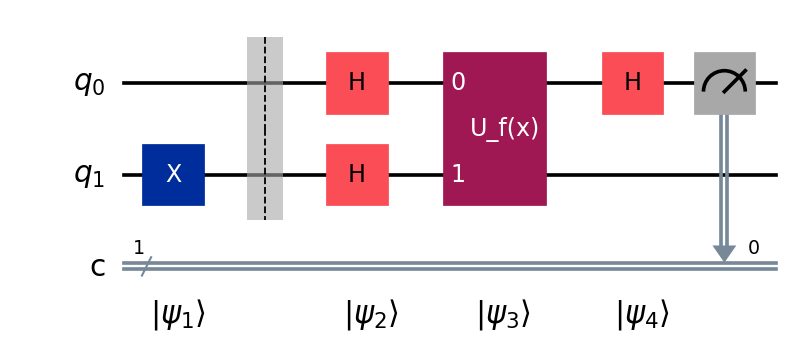

In [1]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import Operator
from qiskit_aer import Aer

import numpy as np

import random

# Generate the circuit
circuit = QuantumCircuit(2, 1)

# Layer 1: Initialization
circuit.x(1)  # Apply X gate to the second qubit
circuit.barrier() 

# Layer 2: Apply Hadamard gates
circuit.h([0, 1])  # Apply Hadamard to both qubits

# Layer 3: Oracle
circuit.unitary([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], [0, 1], label="U_f(x)")

# Layer 4: Hadamard and Measurement
circuit.h(0)  # Apply Hadamard to the first qubit
circuit.measure(0, 0)  # Measure the first qubit

# Draw the circuit with matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
circuit_drawer(circuit, output='mpl', ax=ax)

# Add annotations for each layer
ax.annotate(r"$|\psi_1\rangle$", xy=(0.18, -0), xycoords="axes fraction", fontsize=22, color="black", fontweight="bold")
ax.annotate(r"$|\psi_2\rangle$", xy=(0.43, 0), xycoords="axes fraction", fontsize=22, color="black", fontweight="bold")
ax.annotate(r"$|\psi_3\rangle$", xy=(0.6, 0), xycoords="axes fraction", fontsize=22, color="black", fontweight="bold")
ax.annotate(r"$|\psi_4\rangle$", xy=(0.78, 0), xycoords="axes fraction", fontsize=22, color="black", fontweight="bold")

plt.show()


Description: Two qubits are initialized to $|0\rangle$. An $X$-gate is applied to the second qubit, followed by a layer of Hadamard gates on both qubits. The oracle evaluates the function. A Hadamard gate is applied to the first qubit, and the circuit terminates with a measurement on the first qubit. 

While the query algorithm does not know the inner workings of the oracle, it is guaranteed that the oracle $U_{f(x)}$ computes $f(x)$ for a given input $x$ as follows: 

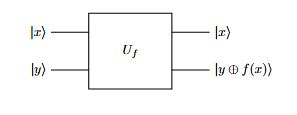

Next, we prove the correcntess of the algorithm. 

## $|\psi_1 \rangle$:

$|\psi_0 \rangle = |00 \rangle$

$(I \otimes X)|\psi_0 \rangle = |01\rangle = | \psi_1 \rangle$

## $|\psi_2\rangle$:

$(H \otimes H) |\psi_1 \rangle = |+ \rangle | - \rangle = \frac{1}{2} \left[ | 00 \rangle - | 01 \rangle + | 10 \rangle - | 11 \rangle \right]  = | \psi_2 \rangle $ 

## $|\psi_3 \rangle$:

$U_{f(x)} | \psi_2 \rangle = \frac{1}{2} \left[ | 0 \rangle | f(0) \rangle  - | 0 \rangle | 1 \oplus f(0) \rangle + | 1 \rangle | f(1) \rangle - | 1 \rangle | 1 \oplus f(1) \rangle  \right] = | \psi_3 \rangle $

## $|\psi_4 \rangle$:

$(H \otimes I) | \psi_3 \rangle = \frac{1}{2} \left[ H| 0 \rangle | f(0) \rangle  - H| 0 \rangle | 1 \oplus f(0) \rangle + H| 1 \rangle | f(1) \rangle - H| 1 \rangle | 1 \oplus f(1) \rangle  \right]$   

We will apply $H$ to the first qubit of each term: 


<ol>
<li>$H | 0 \rangle | f(0) \rangle = \frac{1}{\sqrt{2}} (| 0 \rangle + | 1 \rangle) | f(0) \rangle$</li>

<li>$- H | 0 \rangle | 1 \oplus f(0) \rangle = -\frac{1}{\sqrt{2}} (| 0 \rangle + | 1 \rangle) |1 \oplus f(0) \rangle$</li>


<li>$H | 1 \rangle | f(1) \rangle = \frac{1}{\sqrt{2}} (| 0 \rangle - | 1 \rangle) | f(1) \rangle$</li>

<li>$- H | 1 \rangle | 1 \oplus f(1) \rangle = -\frac{1}{\sqrt{2}} (| 0 \rangle - | 1 \rangle) | 1 \oplus f(1) \rangle$</li>
</ol>

Hence $(H \otimes I) | \psi_3 \rangle $ with the factor of $\frac{1}{2}$ in mind, can be re-written as: 

$$
\frac{1}{2\sqrt{2}} 
\left[ 
| 0 \rangle A + | 1 \rangle B
\right]
$$ 

where 

$A = | f(0) \rangle - | 1 \oplus f(0) \rangle + | f(1) \rangle - | 1 \oplus f(1) \rangle $

$B = | f(0) \rangle - | 1 \oplus f(0) \rangle \textcolor{red}{-} | f(1) \rangle \textcolor{red}{+} | 1 \oplus f(1) \rangle $

Hence, 

$$(H \otimes I) | \psi_3 = \frac{1}{2\sqrt{2}} 
\left[ 
| 0 \rangle A + | 1 \rangle B
\right] = | \psi_4 \rangle$$

Now, we analyze the the analysis before making the measuremnet into two cases:

1. $f(x)$ is constant, that is $f(0) = f(1)$. In that case, $A = 2 | f(0) \rangle - 2 | 1 \oplus f(0)\rangle$ and
$B = 0$. 
Thus, $$| \psi_4 \rangle = \frac{1}{2\sqrt{2}} | 0 \rangle \left[  2 | f(0) \rangle - 2 | 1 \oplus f(0)\rangle \right] = \frac{1}{\sqrt{2}} | 0 \rangle \left[ | f(0) \rangle - | 1 \oplus f(0)\rangle \right] .$$ Since $f(x)$ is a Boolean function, $| f(0) \rangle - | 1 \oplus f(0)\rangle = \pm | 0  \rangle \mp |1 \rangle \equiv | - \rangle $.  Hence, $| \psi_4 \rangle = |0 \rangle | - \rangle$. 


2. $f(x)$ is balanced, that is $f(0) \neq f(1)$. In that case $A = 0$ and with $| 1 \oplus f(0) \rangle = | f(1) \rangle$ and $| f(0) \rangle = | 1 \oplus f(1) \rangle $, we obtain $B = 2 |f(0) \rangle - 2 | f(1) \rangle$ and by similar reasoning, it follows that $| \psi_4 \rangle = \frac{1}{\sqrt{2}} | 1 \rangle \left[ | 0 \rangle - | 1 \rangle \right]  =  |1 \rangle | - \rangle $.

Therefore, we see that if $f(x)$ is constant, then measuring the first qubit of $|\psi_4 \rangle$ will yield $0$ deterministically. Conversely, if $f(x)$ is balanced, the measurement returns $1$ deterministically. 

In conclusion, the query algorithm is capable of determining whether $f$ is constant or balanced deterministically with only making one query. 

---
### The Phase Kickback Trick 

Phase kickback occurs when a controlled operation applies a phase shift to the target qubit, conditional on the state of the control qubit. This conditional phase shift can induce a phase shift on the control qubit, effectively "kicking back" the phase information to the control qubit. 

Phase kickback requires the following conditions to met: 

1. The conrtol qubit(s) must be in superposition. 
2. $| \psi \rangle$ must be an eigenvector of controlled operator $U$. 
3. Operator $U$ must be used in a controlled way. 

For more information about the requirement for a phase kickback, refer to: 

 - https://en.wikipedia.org/wiki/Phase_kickback#Requirements 
 - https://eduardsmetanin.github.io/PhaseKickback.pdf

Abstactly, suppose we would like to apply the controlled-unitary $CU$ on $| \psi_{c} \rangle | \psi_{t} \rangle$, where $c$ denotes the control qubit and $t$ denotes the target. Hence $| \psi_c \rangle = \alpha | 0 \rangle + \beta | 1 \rangle$. For phase kickback trick to work, the state $| \psi_c \rangle$ has to be in a superposition. 

$CU$ as a controlled operator has the following decomposition: 

$$CU = | 0 \rangle \langle 0 | \otimes I + |1 \rangle \langle 1 | \otimes U$$ 

For phasekick back to work, $| \psi_{t} \rangle$ must be an eigenvector of $U$. With $e^{i \phi}$ as eigenvalue of $U$, it follows that $U | \psi_{t} \rangle = e^{i \phi} | \psi_{t} \rangle$. Hence, applying $CU$ on  $| \psi_{c} \rangle | \psi_{t} \rangle$ yields: 

$$
 \alpha | 0 \rangle \otimes | \psi_t \rangle + \beta | 1 \rangle  \otimes e^{i \phi}  | \psi_t \rangle 
= 
\left( \alpha | 0 \rangle + \beta e^{i \phi} | 1 \rangle \right) \otimes | \psi_t \rangle . 
$$

The control qubit has a phase factor $e^{i \phi}$ associated with the $| 1 \rangle$ component. In other words, the phase $e^{i \phi}$ has been transferred from the action of $U$ on the target qubit to the control qubit. 

### Phase Kickback in Deutsch Algorithm

In the Deutsch algorithm, the oracle $U_{f(x)}$ is a controlled operation that maps $U_{f(x)}|x\rangle |y \rangle \mapsto |x \rangle |y \oplus f(x) \rangle$ with $| y \rangle = | - \rangle$. 

If $f(x) = 0$, then $|y \oplus f(x) \rangle = | y \rangle = (-1)^{f(x)} | y \rangle$. 

If $f(x) = 1$, then $| y \oplus f(x) \rangle = \frac{1}{\sqrt{2}} \left[ | 0 \oplus 1 \rangle - | 1 \oplus 1  \rangle \right] = \frac{1}{\sqrt{2}} \left( | 1 \rangle - | 0 \rangle  \right) = - \frac{1}{\sqrt{2}} | - \rangle = (-1)^{f(x)} | y \rangle$. 

Therefore, the oracle $U_{f(x)}$ can be understood as a phase kickback operator on the control qubit, where $U_{f(x)}|x\rangle |y \rangle \mapsto (-1)^{f(x)} |x \rangle |y \rangle$. It is important to note that $U_{f(x)}$ is not inherently a phase kickback operator. Rather through the specific design choices of the query algorithm, it has been repurposed to function as one.

Hence, the overall state of the quantum state after applying $U_{f(x)}$ becomes:  

$$
| \psi_3 \rangle = \frac{1}{\sqrt{2}} \left[ (-1)^{f(0)} | 0 \rangle | - \rangle + (-1)^{f(1)} | 1 \rangle | - \rangle  \right]
$$

Thus, if $f$ is constant, that is, $f(0) = f(1)$, then 
$| \psi_3 \rangle = (-1)^{f(0)} \frac{1}{\sqrt{2}} \left[ | 0 \rangle | - \rangle + |1 \rangle | - \rangle \right] 
= (-1)^{f(0)} | + - \rangle
$. Applying Hadamard yields $| \psi_4 \rangle = | 0 - \rangle$, and measuring the first qubit returs $0$ as before. 


On the other hand, if $f(x)$ is balanced, that is $f(0) \neq f(1)$, up to an overall global factor of $\pm 1$, we can write $| \psi_3 \rangle$ as:

$$ \pm \frac{1}{\sqrt{2}} \left( | 0 - \rangle -  | 1 - \rangle \right) = \pm | - - \rangle $$

Applying a Hadamard on the first qubit, as before, yields $| \psi_4 \rangle = \pm |1 - \rangle $ and measuring the first qubit returns $1$, as shown previously. 

In the case of Deutsch's algorithm, $e^{i \phi}$ can be written as $(-1)^{f(x)}$, although this simplification does not hold in general. Specifically, in Deutsch's algorithm, $\phi = \pi \cdot f(x)$, where $f(x) = \{ 0,1 \}$. For this reason, $e^{i \phi}$ reduces to $(-1)^{f(x)}$. 

By leveraging of phase kickback, Deutsch's algorithm determines whether $f(x)$ is balanced or constant. 

---
### $U_f$ as a unitary operator 

Quantum oracle $U_f$ is a unitary operator that encodes $f$ into quantum states. Note that while $U_f$ is treated as black-box, it still needs to be a valid unitary operator. As a matter of fact, due to being a unitary operator, $U_f$ cannot be a single-qubit operator, since in that case $U_f$ would not be reversible. Hence $U_f$ must be at least a two-qubit operator. 

Note that Deutsch's algorithm is a promise problem, that is it is promised that $U_f$ acts in a pre-determined way while keeping $f$ hidden. Specifically, it is promised that $U_f | x \rangle | y \rangle = | x \rangle | y \oplus f(x) \rangle$. 

The next question is, for a particular choice of $f$, how can $U_f$ be constructed. Recall that the set of Boolean functions $f$ such that $f: \{0,1 \} \rightarrow \{0,1\}$ consists of four functions, so in total there could be $4$ different implementations of $U_f$ for each $f$. Next we will consider these possibilities: 

1. $f_1(0) = 0, f_1(1) = 0$: 
In this case $f(x) = 0$ and $| y \oplus f(x) \rangle = | y \rangle$. Therefore, $U_f$ can easily be construced via $U_f = I \otimes I$. 

2. $f_2(0) = 1, f_2(1) = 1$:

In this case $| y \oplus f(x) \rangle = | y \oplus 1 \rangle$, which always introduces a bit flip. Hence
$U_f = I \otimes X$. 

3. $f_3(0) = 0, f_3(1) = 1$: 

In this case $| y \oplus f(x) \rangle = | y \oplus 1 \rangle$ only when $x=1$. That is the bit flip is conditional on $x=1$, which requires the use of $CNOT$ gate and as such $U_f = CNOT$. 

4. $f_4(0) = 1, f_4(1) = 0$: 

In this case $| y \oplus f(x) \rangle = | y \oplus 1 \rangle$ only when $x=0$. Although this is very similar to the third case, it does not quite use the $CNOT$ gate but a gate with a similar flavour. Note that $CNOT$ induces a bit flip when $x=1$. Now, we demand a bit flip only when $x=0$. Such a gate is referred to as negative controlled gate or flipped controlled gate, see: 
https://quantumcomputing.stackexchange.com/questions/6546/how-do-you-implement-a-negative-controlled-gate-using-the-regular-controlled-gat

We denote this gate as $\overline{CNOT} = (X \otimes I) \cdot CNOT \cdot (X \otimes I) = |0 \rangle \langle 0 | \otimes X + | 1 \rangle \langle 1 | \otimes I=
\begin{bmatrix}
 0 & 1 & 0 & 0 \\
 1 & 0 & 0 & 0 \\
 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1
\end{bmatrix}
$. 

---
### Deutsch Algorithm in Qiskit

Next, we demonstrate the Deutsch algorithm in practice. 

In [2]:
def quantum_oracle(qc, n:int):
    if n == 1:
        qc.id(0)
        qc.id(1)
        
    if n == 2:
        qc.id(0)
        qc.x(1)
        
    if n == 3: 
        qc.cx(0,1)

    if n == 4:
        # Define the negative controlled-NOT 
        negative_cnot = np.array(
            [[0., 1., 0., 0.],
             [1., 0., 0., 0.],
             [0., 0., 1., 0.],
             [0., 0., 0., 1.]])

        n_cnot_gate = Operator(negative_cnot)
        # Apply the negative CNOT gate
        qc.unitary(n_cnot_gate, [1, 0], label='nCNOT')

Note we apply `qc.unitary(n_cnot_gate, [1, 0], label='nCNOT')` where `1` is the target qubit and `0` is the control qubit. This order is the reverse of how control and target qubits are typically specified in other quantum packages and textbooks, where the control qubit comes first followed by the target qubit. This is because, for good or bad, qiskit does things a bit differently. The following passage is from [qiskit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.CXGate): 

> In Qiskit’s convention, higher qubit indices are more significant (little endian convention). In many textbooks, controlled gates are presented with the assumption of more significant qubits as control.

For more information about the endian convention (big-endian and little-endian), refer to:
 - https://en.wikipedia.org/wiki/Endianness

In [3]:
# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2, 1)

qc.x(1)

# Add a barrier
qc.barrier()

# Apply the Hadamard gate to both qubits
qc.h(0)
qc.h(1)

qc.barrier()

quantum_oracle(qc, 4)
qc.barrier()

qc.h(0)

# Measure the first qubit
qc.measure(0, 0)

# Draw the circuit
print(qc.draw())

# Run the circuit on a qasm simulator to get the measurement outcome
backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc).result()
counts = result.get_counts()
print("Measurement outcome:", counts)

           ░ ┌───┐ ░ ┌────────┐ ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░─┤1       ├─░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ │  nCNOT │ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤0       ├─░───────╫─
     └───┘ ░ └───┘ ░ └────────┘ ░       ║ 
c: 1/═══════════════════════════════════╩═
                                        0 
Measurement outcome: {'1': 1024}


In [4]:
def deutsch_algorithm(n: int):
    # Create a quantum circuit with 2 qubits and 1 classical bit
    qc = QuantumCircuit(2, 1)

    # Initialize the second qubit to |1⟩
    qc.x(1)

    # Add a barrier
    qc.barrier()

    # Apply the Hadamard gate to both qubits
    qc.h(0)
    qc.h(1)

    qc.barrier()

    # Apply the quantum oracle
    quantum_oracle(qc, n)

    # Add a barrier
    qc.barrier()

    # Apply the Hadamard gate to the first qubit again
    qc.h(0)

    # Measure the first qubit
    qc.measure(0, 0)

    # Draw the circuit
    circuit_drawing = qc.draw()

    backend = Aer.get_backend('qasm_simulator')
    result = backend.run(qc).result()
    counts = result.get_counts()

    return circuit_drawing, counts

In [5]:
random_number = random.randint(1, 4)
measured_result = int(list(deutsch_algorithm(random_number)[1].keys())[0])

algorithm_decision = "constant" if measured_result == 0 else "balanced"
ground_truth = "constant" if random_number in [1,2] else "balanced"

# Print the results
print("Random Oracle Number:", random_number)
print("Deutsch Algorithm Output:", algorithm_decision)
print("Actual Function Type:", ground_truth)

Random Oracle Number: 3
Deutsch Algorithm Output: balanced
Actual Function Type: balanced


---
### Classical vs Quantum Comparison 

1. **Query Complexity vs. Circuit Complexity**

The Deutsch algorithm utilizes additional quantum operations, including one $X$ gate, three Hadamard gates and a single measurement operator. Despite these supplementary steps, it is argued that the algorithm requires only a single query to determine the solution, in contrast to the two queries required in the optimal classical approach. Here, "single query" refers specifically to the number of times the quantum oracle is accessed, irrespective of the circuit's overall gate complexity. While in the standard quantum circuit model, these operations are assumed to have some cost, but in the query complexity model, they are often considered "free". That is not meant to suggest they have no practical cost in a real quantum computer, but rather to simplify and isolate the key theoretical insight about query complexity. 

Having said that, this distinction prompts an important consideration: if solving the problem necessiated a substantially more complex quantum circuit, would the algorithm still be regarded as efficient? Query complexity is a separate theoretical lens: it asks if, in principle, fewer oracle calls are enough for a quantum machine to learn something that would require more oracle calls classically. This difference in the number of queries is what demonstrates a form of quantum advantage, even if the full picture of running the algorithm on a large problem might need a more nuanced efficiency analysis.

2. **Partial Information vs. Full Description**

The Deutsch problem solves the specific problem of determining whether a function $f$ is "balanced" or "constant". Further discussion on this topic can be found in 'Nature of symmetry in the problem and source of quantum speedup'. The key point to note is that that the Deutsch algorithm does not provide a full description of $f$; instead, it reveals a specific property of $f$, namely, whether its outputs are balanced or constant. Conversely, the classical solution, while requiring two queries, reveals $f$ completely. That said, two quantum queries are also sufficient to describe $f$ fully. This contrast highlighs the nature of quantum advantage as being problem-specific rather than universally descriptive.  



---
### Nature of symmetry in the problem and source of quantum speedup 

Symmetry refers to the invariance properties of the problem under certain transformations. In the context of Deutsch algorithm, it captures how the structure of the function $f: \{ 0,1 \} \rightarrow \{ 0,1 \}$ and the decision problem (constant vs. balanced) remain unaffected by specific changes. This symmetry enables the algorithm to learn a global feature of $f$ by evaluating the superposition of $f(0)$ and $f(1)$ via one query. 

In case $f$ is constant $f(0) = f(1)$, after querying the quantum oracle, we obtain the state $\frac{1}{\sqrt{2}} \left( (-1)^{f(0)} (| 0 \rangle + | 1 \rangle)  \right) \otimes | - \rangle $. The quanutm oracle $U_f$ has no physically observable impact on the overall quantum state. 

On the other hand, when $f$ is balanced $f(0) \neq f(1)$, and after applying $U_f$ the state becomes $\pm \frac{1}{\sqrt{2}} ( | 0 \rangle \textcolor{red}{-} | 1 \rangle  ) \otimes | - \rangle$, which induces a relative phase shift and consequently leaving mark to detect a balanced function. Note that while a global phase has no physical observable significance, a **relative phase shift** is observable. By applying the final Hadamard gate in the last layer of the algorithm, we effectively force this observable quantity to be revealed.

For more information refer to:

 - https://quantumcomputing.stackexchange.com/questions/5125/what-is-the-difference-between-a-relative-phase-and-a-global-phase-in-particula

**Global Phase**

A global phase is a multiplication of quantum state by a complex scalar of unit magnitude $e^{i \phi}$. That is, transforming $| \psi \rangle$ to $e^{i \theta} | \psi \rangle$ is considered a global phase shift. This transformation has no observable effect. The inner product 
$$\langle \psi | e^{i \theta} \psi \rangle = \left( \alpha^\ast \langle 0 | + \beta^\ast \langle 1 | \right) \cdot 
\left( e^{i \theta} \alpha | 0 \rangle + \beta | 1 \rangle \right)
= e^{i \theta} \left( \alpha^\ast \alpha \underbrace{\langle 0 | 0 \rangle}_{=1} 
+ \alpha^\ast \beta \underbrace{\langle 0 | 1 \rangle}_{= 0} + \beta^\ast \alpha \underbrace{\langle 1 | 0 \rangle}_{= 0} 
+ \beta^\ast \beta \underbrace{\langle 1 | 1 \rangle}_{=1} 
\right) =
e^{i \theta} \left( \underbrace{\alpha^\ast \alpha + \beta^\ast \beta}_{= 1} \right)
= e^{i \theta}. 
$$

Hence, 
$$\left| \langle \psi | e^{i \theta} \psi \rangle \right| = |e^{i \theta}| = 1$$. 

Since the inner product of $| \psi \rangle$ and $e^{i \theta} | \psi \rangle$ has a magnitude of $1$, the states $| \psi \rangle$ and $e^{i \theta} | \psi \rangle$ are consdiered equivalent under global phase. 


**Relative Phase**

A relative phase refers to the phase difference between the compnents of a quantum state. For a single-qubit state, the transformation $| \psi \rangle = \alpha | 0 \rangle + \beta | 1 \rangle \xrightarrow{U} | \psi' \rangle = \alpha |0 \rangle + \textcolor{red}{e^{i \phi}} \beta | 1 \rangle$ induces a phase shift $\phi$. 

Unlike global phase, relative phase is physically meaningful as it determines interference patterns and changes the measurement probabilities.  

Let $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ and $|\psi'\rangle = \alpha |0\rangle + e^{i\phi}\beta |1\rangle$.

The inner product $\langle \psi | \psi' \rangle$ is:

$$
\begin{aligned}
\langle \psi | \psi' \rangle &= (\alpha^* \langle 0| + \beta^* \langle 1|)(\alpha |0\rangle + e^{i\phi}\beta |1\rangle) \\
&= \alpha^* \alpha \langle 0 | 0\rangle + e^{i\phi} \alpha^* \beta \langle 0 | 1\rangle + \beta^* \alpha \langle 1 | 0\rangle + e^{i\phi} \beta^* \beta \langle 1 | 1\rangle. \\
&= \alpha^* \alpha + e^{i \phi} \beta^* \beta \\
&= | \alpha |^2 + |\beta|^2 e^{i \phi}.
\end{aligned}
$$


To compute the magnitude of the inner product:
$$
|\langle \psi | \psi' \rangle| = \sqrt{\left(\operatorname{Re}(\langle \psi | \psi' \rangle)\right)^2 + \left(\operatorname{Im}(\langle \psi | \psi' \rangle)\right)^2}.
$$

Expand $e^{i\phi}$ using Euler's formula:
$$
e^{i\phi} = \cos\phi + i\sin\phi.
$$

Thus:
$$
\langle \psi | \psi' \rangle = |\alpha|^2 + |\beta|^2 (\cos\phi + i\sin\phi).
$$

Separate the real and imaginary parts:
$$
\operatorname{Re}(\langle \psi | \psi' \rangle) = |\alpha|^2 + |\beta|^2 \cos\phi, \quad \operatorname{Im}(\langle \psi | \psi' \rangle) = |\beta|^2 \sin\phi.
$$

Now compute the magnitude:
$$
|\langle \psi | \psi' \rangle| = \sqrt{\left(|\alpha|^2 + |\beta|^2 \cos\phi\right)^2 + \left(|\beta|^2 \sin\phi\right)^2}.
$$

Expand the first term:
$$
\left(|\alpha|^2 + |\beta|^2 \cos\phi\right)^2 = |\alpha|^4 + 2|\alpha|^2|\beta|^2 \cos\phi + |\beta|^4 \cos^2\phi.
$$

Add the second term:
$$
|\langle \psi | \psi' \rangle| = \sqrt{|\alpha|^4 + 2|\alpha|^2|\beta|^2 \cos\phi + |\beta|^4 (\cos^2\phi + \sin^2\phi)}.
$$

Since $\cos^2\phi + \sin^2\phi = 1$, we simplify:
$$
|\langle \psi | \psi' \rangle| = \sqrt{|\alpha|^4 + 2|\alpha|^2|\beta|^2 \cos\phi + |\beta|^4}.
$$

### **Physical Interpretation**
- For $\phi = 0$, $\cos\phi = 1$, and the magnitude becomes:
$$
|\langle \psi | \psi' \rangle| = |\alpha|^2 + |\beta|^2 = 1.
$$
- For $\phi = \pi$, $\cos\phi = -1$, and the magnitude becomes:
$$
|\langle \psi | \psi' \rangle| = ||\alpha|^2 - |\beta|^2|.
$$

The relative phase $\phi$ affects the overlap between $|\psi\rangle$ and $|\psi'\rangle$, demonstrating its role as an observable effect.

Note that the overlap between $| \phi \rangle $ and $| \phi' \rangle$ is minimized when $\phi = \pi$. This corresponds to maximizing the distance between $| \phi \rangle $ and $| \phi' \rangle $. Here is a mathematical proof:

The inner product is:
$$
\langle \psi | \psi' \rangle = |\alpha|^4 + 2|\alpha|^2|\beta|^2\cos\phi + |\beta|^4.
$$

### 1. Function to Minimize
Define:
$$
f(\phi) = |\alpha|^4 + 2|\alpha|^2|\beta|^2\cos\phi + |\beta|^4.
$$

### 2. Take the Derivative
The derivative of $f(\phi)$ with respect to $\phi$ is:
$$
\frac{d}{d\phi} f(\phi) = \frac{d}{d\phi} \left(|\alpha|^4 + 2|\alpha|^2|\beta|^2\cos\phi + |\beta|^4\right).
$$

Since $|\alpha|^4$ and $|\beta|^4$ are independent of $\phi$:
$$
\frac{d}{d\phi} f(\phi) = -2|\alpha|^2|\beta|^2\sin\phi.
$$

### 3. Solve for Critical Points
Set $\frac{d}{d\phi}f(\phi) = 0$:
$$
-2|\alpha|^2|\beta|^2\sin\phi = 0.
$$

The solutions are:
$$
\sin\phi = 0 \implies \phi = 0, \pi, 2\pi, \dots
$$

### 4. Evaluate $f(\phi)$ at Critical Points
- At $\phi = 0$:
$$
f(0) = |\alpha|^4 + 2|\alpha|^2|\beta|^2(1) + |\beta|^4 = (|\alpha|^2 + |\beta|^2)^2 = 1.
$$

- At $\phi = \pi$:
$$
f(\pi) = |\alpha|^4 + 2|\alpha|^2|\beta|^2(-1) + |\beta|^4 = (|\alpha|^2 - |\beta|^2)^2.
$$

Since $(|\alpha|^2 - |\beta|^2)^2 \leq (|\alpha|^2 + |\beta|^2)^2$, $f(\phi)$ is minimized at $\phi = \pi$.

### 5. Relationship to Distance
The distance is:
$$
D(\phi) = \sqrt{1 - |\langle \psi | \psi' \rangle|^2}.
$$

- At $\phi = 0$, $|\langle \psi | \psi' \rangle| = 1$, so:
$$
D(0) = \sqrt{1 - 1^2} = 0.
$$

- At $\phi = \pi$, $|\langle \psi | \psi' \rangle| = ||\alpha|^2 - |\beta|^2|$, so:
$$
D(\pi) = \sqrt{1 - (|\alpha|^2 - |\beta|^2)^2}.
$$

The inner product $|\langle \psi | \psi' \rangle|$ is minimized at $\phi = \pi$, which corresponds to the maximum distance $D(\phi)$ between the states. This confirms that $\phi = \pi$ introduces the largest distinguishability between the states.


### **Effect of the Phase Shift**
The phase shift $\phi$ introduces terms involving $e^{i\phi}$, which alter the interference between the $|0\rangle$ and $|1\rangle$ components. This change impacts measurable probabilities, making the relative phase $\phi$ observable through interference or transformation-based measurements.


The Deutsch algorithm leverages the concept of maximizing the relative phase difference to distinguish between the cases of a constant versus a balanced function with a single query, achieving its quantum advantage. 

### Inducing a Relative Phase Shift



1. **Parameterized Phase Gate**

   Relative phase $\phi$ can be induced via the parameterized phase gate:
   $$
   P(\phi) = 
   \begin{bmatrix} 
   1 & 0 \\ 
   0 & e^{i \phi} 
   \end{bmatrix}.
   $$

   For a qubit state $| \psi \rangle = \alpha | 0 \rangle + \beta | 1 \rangle$, applying the phase gate results in:
   $$
   P(\phi) | \psi \rangle = \alpha | 0 \rangle + \beta e^{i \phi} | 1 \rangle.  
   $$

   The phase gate is a special case of the $R_z (\theta)$ rotation gate, specifically when $\theta = 2 \phi$. The relationship is:
   $$
   R_z(\theta) = \begin{bmatrix} 
   e^{-i \frac{\theta}{2}} & 0 \\
   0 & e^{i \frac{\theta}{2}}
   \end{bmatrix},
   $$
   whereas: 
   $$
   P(\phi) = \begin{bmatrix} 
   1 & 0 \\
   0 & e^{i \phi}
   \end{bmatrix}.
   $$

   Thus, $P(\phi) = R_z (2 \phi)$ up to a global phase factor. 

2. **Phase Kickback**

   Another method for inducing a relative phase shift is via phase kickback, which has already been explored. Phase kickback refers to the phenomenon where a phase shift applied to a target qubit during a controlled operation gets "kicked back" to the control qubit as a relative phase.


### Making a Relative Phase Shift Observable

To observe the effect of a relative phase shift, a transformation is required to convert phase information into measurable amplitude differences. In the Deutsch algorithm, the Hadamard gate serves this purpose by mapping the relative phase into distinct amplitudes for 
$| 0 \rangle$ and  $| 1 \rangle$.

---
### No Entanglement

In the computations performed in the Deutsch algorithm, entanglement is not use, even when considering the quantum oracle as a unitary operator and the presence of a controlled-NOT gate in the balanced cases of $f$, along with Hadamard gates, which are typically associated with creating entanglement.

While this result may be surprising, as quantum speedup is often intuitively linked to entanglement, the Deutsch algorithm demonstrates that entanglement is not a necessary requirement for achieving quantum speedup. That said, the scope of quantum speedup can be argued to be quite limited in the absence of entanglement. For instance, achieving exponential speedup over classical computation requires the presence of multi-partite entanglement

See: [On the role of entanglement in quantum computational speed-up](https://arxiv.org/abs/quant-ph/0201143).

---
# Appendices

---
### Appendix 1: Biography

[David Deutsch](https://en.wikipedia.org/wiki/David_Deutsch) (born 18 May 1953), a British physicist, widely regarded as one of the pioneers of quantum computing. He is known for his foundational work in quantum mechanics, quantum computation, and the philosophy of science.

The original paper by David Deutsch, which introduced what is now known as Deutsch's algorithm, can be accessed here:
https://www.cs.princeton.edu/courses/archive/fall04/cos576/papers/deutsch85.pdf

---
### Appendix 2: Flipped Controlled Gate

We have a controlled unitary gate $CU$, where:
- The control qubit is the first qubit, and
- The target qubit is the second qubit.

The gate $CU$ applies the unitary $U$ to the target qubit only when the control qubit is in the state $|1\rangle:
$$
CU = |0\rangle\langle 0| \otimes I + |1\rangle\langle 1| \otimes U.
$$

Now, we want to create a flipped controlled gate, denoted as $\overline{CU}$, that applies $U$ to the target qubit only when the control qubit is in the state $|0\rangle$:

$$
\overline{CU} = |0\rangle\langle 0| \otimes U + |1\rangle\langle 1| \otimes I.
$$

### What We Are Trying to Show
We hypothesize that the flipped controlled gate can be obtained by conjugating $CU$ with the Pauli-X gate applied to the control qubit. Specifically:
$$
(X \otimes I) \cdot CU \cdot (X \otimes I) = \overline{CU}.
$$

Our goal is to prove this equivalence step-by-step using the operator definitions without relying on specific input states.

We aim to prove:
$$
(X \otimes I) \cdot CU \cdot (X \otimes I) = \overline{CU},
$$
where:
- $CU = |0\rangle\langle 0| \otimes I + |1\rangle\langle 1| \otimes U$,
- $\overline{CU} = |0\rangle\langle 0| \otimes U + |1\rangle\langle 1| \otimes I$,
- $X = |1\rangle\langle 0| + |0\rangle\langle 1|$ swaps $|0\rangle \leftrightarrow |1\rangle$.

<hr style="width: 50%; margin: auto; border: 1px solid gray;">


### Proof
Start with:
$$
(X \otimes I) \cdot CU \cdot (X \otimes I) = (X \otimes I) \Big( (|0\rangle\langle 0| \otimes I) + (|1\rangle\langle 1| \otimes U) \Big) (X \otimes I).
$$

#### Expand Each Term
1. First term:
   $$
   (X \otimes I) (|0\rangle\langle 0| \otimes I) (X \otimes I).
   $$
   Using $X |0\rangle\langle 0| X = |1\rangle\langle 1|$:
   $$
   = |1\rangle\langle 1| \otimes I.
   $$

2. Second term:
   $$
   (X \otimes I) (|1\rangle\langle 1| \otimes U) (X \otimes I).
   $$
   Using $X |1\rangle\langle 1| X = |0\rangle\langle 0|$:
   $$
   = |0\rangle\langle 0| \otimes U.
   $$

#### Combine Results
$$
(X \otimes I) \cdot CU \cdot (X \otimes I) = |1\rangle\langle 1| \otimes I + |0\rangle\langle 0| \otimes U.
$$

Reordering terms:
$$
(X \otimes I) \cdot CU \cdot (X \otimes I) = |0\rangle\langle 0| \otimes U + |1\rangle\langle 1| \otimes I.
$$

<hr style="width: 50%; margin: auto; border: 1px solid gray;">

### Conclusion
This matches the definition of $\overline{CU}$:
$$
\overline{CU} = |0\rangle\langle 0| \otimes U + |1\rangle\langle 1| \otimes I.
$$

Thus:
$$
(X \otimes I) \cdot CU \cdot (X \otimes I) = \overline{CU}.
$$

### Why Does the $X$ Gate Work for Conjugating the Flipped Controlled Gate?

The special property of the $X$ gate is that it swaps the computational basis states $| 0 \rangle$ and $| 1 \rangle$, effectively flipping the role of the control state in a controlled gate. This swapping property ensures that the "control logic" is inverted, enabling the argument to work for constructing the flipped controlled gate.

Other gates like the $Z$ gate and Hadamard gate do not induce such flipping, and therefore they are not appropriate choices in this argument.

---
### Appendix 3: Deutsch Algoithm in PennyLane and Cirq

In [6]:
import pennylane as qml
from pennylane import numpy as np

In [7]:
# Define the quantum oracle in PennyLane
def quantum_oracle_pennylane(n: int):
    if n == 1:
        # Identity gate on both qubits (PennyLane applies identity by default if no operation)
        pass

    elif n == 2:
        # Apply X gate on the second qubit
        qml.PauliX(wires=1)

    elif n == 3:
        # Apply CNOT with control qubit 0 and target qubit 1
        qml.CNOT(wires=[0, 1])

    elif n == 4:
        # Apply negative CNOT gate
        negative_cnot = np.array(
            [[0., 1., 0., 0.],
             [1., 0., 0., 0.],
             [0., 0., 1., 0.],
             [0., 0., 0., 1.]])
        qml.QubitUnitary(negative_cnot, wires=[0, 1])

# Create a device with 2 qubits
dev = qml.device("default.qubit", wires=2, shots=1024)

@qml.qnode(dev)
def deutsch_algorithm_pennylane(n):
    # Step 1: Apply X gate to the second qubit
    qml.PauliX(wires=1)

    # Step 2: Apply Hadamard gate to both qubits
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    # Step 3: Apply the oracle
    quantum_oracle_pennylane(n)

    # Step 4: Apply Hadamard gate to the first qubit
    qml.Hadamard(wires=0)

    # Step 5: Measure the first qubit
    return qml.sample(wires=0)

n = 1
measurement_result = deutsch_algorithm_pennylane(n)

# Print the measurement outcome
unique, counts = np.unique(measurement_result, return_counts=True)
print("Measurement outcome:", dict(zip(unique, counts)))

Measurement outcome: {tensor(0, dtype=int64, requires_grad=True): 1024}


In [8]:
import cirq

In [9]:
# Define the quantum oracle
def quantum_oracle_cirq(circuit, qubits, n):
    if n == 1:
        # Identity operation on both qubits
        pass
    elif n == 2:
        # Identity on qubit 0, X on qubit 1
        circuit.append([cirq.I(qubits[0]), cirq.X(qubits[1])])
    elif n == 3:
        # CNOT with qubit 0 as control, qubit 1 as target
        circuit.append(cirq.CNOT(qubits[0], qubits[1]))
    elif n == 4:
        # Define and apply the negative controlled-NOT gate
        negative_cnot = np.array([
            [0., 1., 0., 0.],
            [1., 0., 0., 0.],
            [0., 0., 1., 0.],
            [0., 0., 0., 1.]
        ])
        neg_cnot_gate = cirq.MatrixGate(negative_cnot)
        circuit.append(neg_cnot_gate.on(qubits[0], qubits[1]))

# Create the Cirq circuit
def deutsch_algorithm_cirq(n):
    # Define two qubits
    q0, q1 = cirq.LineQubit.range(2)
    
    # Create the circuit
    circuit = cirq.Circuit()

    # Initialize the second qubit to |1⟩
    circuit.append([cirq.I(q0), cirq.X(q1)])
    
    # Apply Hadamard to both qubits
    circuit.append([cirq.H(q0), cirq.H(q1)])
    
    # Apply the quantum oracle
    quantum_oracle_cirq(circuit, [q0, q1], n)

    # Apply Hadamard to the first qubit
    circuit.append(cirq.H(q0))

    # Measure the first qubit
    circuit.append(cirq.measure(q0, key='result'))

    return circuit

n = 4
circuit = deutsch_algorithm_cirq(n)
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1024)

# Get measurement counts
counts = result.histogram(key='result')
print("Circuit:")
print(circuit)
print("Measurement outcome:", counts)

Circuit:
              ┌           ┐
              │0. 1. 0. 0.│
0: ───I───H───│1. 0. 0. 0.│───H───M('result')───
              │0. 0. 1. 0.│
              │0. 0. 0. 1.│
              └           ┘
              │
1: ───X───H───#2────────────────────────────────
Measurement outcome: Counter({1: 1024})


Verification of $(X \otimes I) \cdot CNOT \cdot (X \otimes I) = |0 \rangle \langle 0 | \otimes X + | 1 \rangle \langle 1 | \otimes I=
\begin{bmatrix}
 0 & 1 & 0 & 0 \\
 1 & 0 & 0 & 0 \\
 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1
\end{bmatrix}
$.

In [10]:
X = np.array([[0,1],[1,0]])
CNOT = np.array([
                [1,0,0,0],
                [0,1,0,0],
                [0,0,0,1],
                [0,0,1,0],
])

In [11]:
np.kron(X, np.eye(2)) @ CNOT @ np.kron(X, np.eye(2))

tensor([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], requires_grad=True)

In [12]:
np.kron(np.array([[1],[0]])@np.array([[1],[0]]).T, X) + np.kron(np.array([[0],[1]])@np.array([[0],[1]]).T, np.eye(2))

tensor([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], requires_grad=True)